# Climate
    v1 - Long-term SST trend

In [31]:
%matplotlib notebook

In [73]:
# imports
import os
import numpy as np
from scipy import signal

import matplotlib
from matplotlib import pyplot as plt

import datetime

import pandas
import iris

# Load the 30yr climate cube

In [3]:
climate_file = os.path.join(os.getenv('NOAA_OI'), 'NOAA_OI_climate_1983-2012.nc')
seasonalT = iris.load(climate_file, 'seasonalT')[0]

In [4]:
seasonalT

<iris 'Cube' of seasonalT / (C) (day: 366; latitude: 720; longitude: 1440)>

## Expose the data

In [6]:
sT_data = seasonalT.data[:]
sT_data.shape

(366, 720, 1440)

In [12]:
seasonalT.coord('day')

DimCoord(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178

# Examine a few years

In [50]:
years = (1983, 2019)

In [51]:
noaa_path = os.getenv('NOAA_OI')

In [53]:
feb29 = 60

In [56]:
(1983-1984) % 4

3

In [72]:
sv_yr, sv_dy, sv_medSST, sv_medSSTa = [], [], [], []
for year in range(years[0], years[1]+1):
    print('year={}'.format(year))
    # Load
    noaa_file = os.path.join(noaa_path, 'sst.day.mean.{}.nc'.format(year))
    sst_cube = iris.load(noaa_file, 'sst')[0]
    # Loop on days
    SST = sst_cube.data[:]
    for day in range(SST.shape[0]):
        #print('day={}'.format(day))
        SSTd = SST[day,:,:]
        sv_yr.append(year)
        sv_dy.append(day+1) # Jan 1 = 1
        # Stats
        sv_medSST.append(np.median(SSTd[~SSTd.mask]))
        #import pdb; pdb.set_trace()
        # Deal with leap year
        offset = 0
        if ((year-1984) % 4) != 0 and (day >= 60):
            offset = 1
        # SSTa
        SSTa = SSTd - sT_data[day+offset,:,:]
        sv_medSSTa.append(np.median(SSTa[~SSTd.mask]))

year=1983


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1984


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1985


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1986


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1987


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1988


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1989


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1990


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1991


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1992


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1993


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1994


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1995


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1996


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1997


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1998


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=1999


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2000


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2001


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2002


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2003


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2004


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2005


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2006


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2007


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2008


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2009


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2010


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2011


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2012


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2013


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2014


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2015


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2016


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2017


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2018


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


year=2019


/home/xavier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


# Dates

In [77]:
tidx = np.arange(len(sv_dy))

In [78]:
tord = [datetime.datetime(year, 1,1) + datetime.timedelta(days=day-1) for year, day in zip(sv_yr, sv_dy)]

In [79]:
tord[0]

datetime.datetime(1983, 1, 1, 0, 0)

# Pandas table

In [80]:
pd_dict = dict(date=tord, medSST=sv_medSST, medSSTa=sv_medSSTa)

In [81]:
pd_tbl = pandas.DataFrame(pd_dict)
pd_tbl = pd_tbl.set_index('date')
pd_tbl.head()

,medSST,medSSTa
date,,
1983-01-01,14.58,-0.006800
1983-01-02,14.62,0.003953
1983-01-03,14.61,0.010251
1983-01-04,14.52,0.012217
1983-01-05,14.44,0.012186


In [82]:
pd_tbl.index

DatetimeIndex(['1983-01-01', '1983-01-02', '1983-01-03', '1983-01-04',
               '1983-01-05', '1983-01-06', '1983-01-07', '1983-01-08',
               '1983-01-09', '1983-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=13514, freq=None)

# Plots

## Median SST

<IPython.core.display.Javascript object>


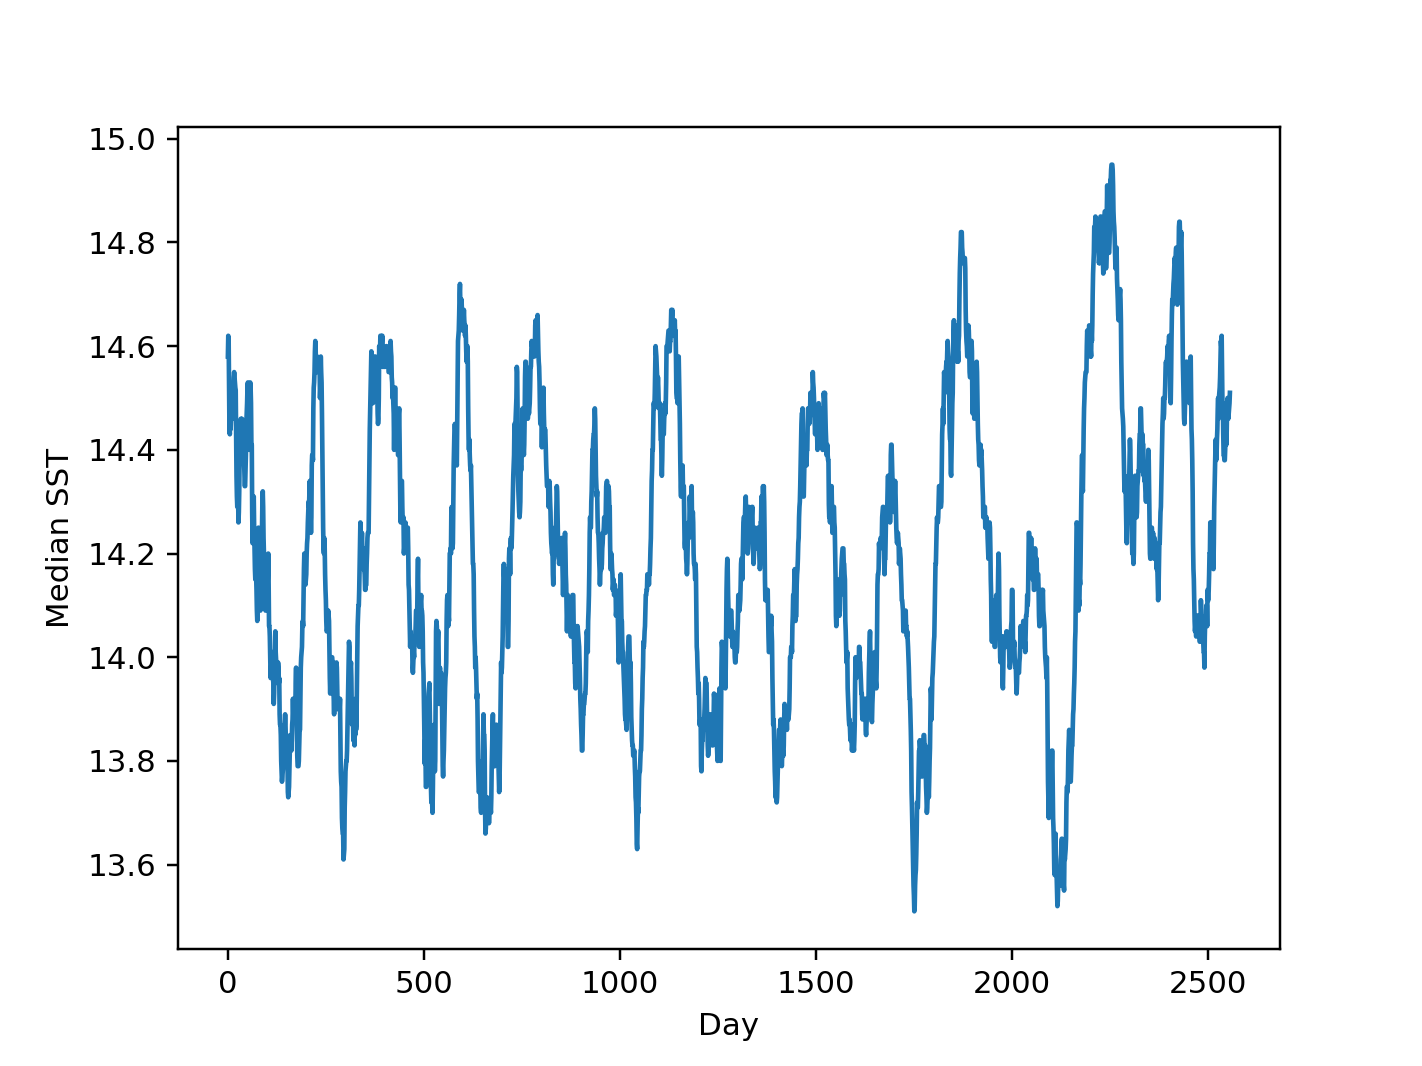

In [38]:
plt.clf()
ax = plt.gca()
#
ax.plot(tidx, sv_medSST)
#
ax.set_ylabel('Median SST')
ax.set_xlabel('Day')
#
plt.show()

## Median SSTa

<IPython.core.display.Javascript object>


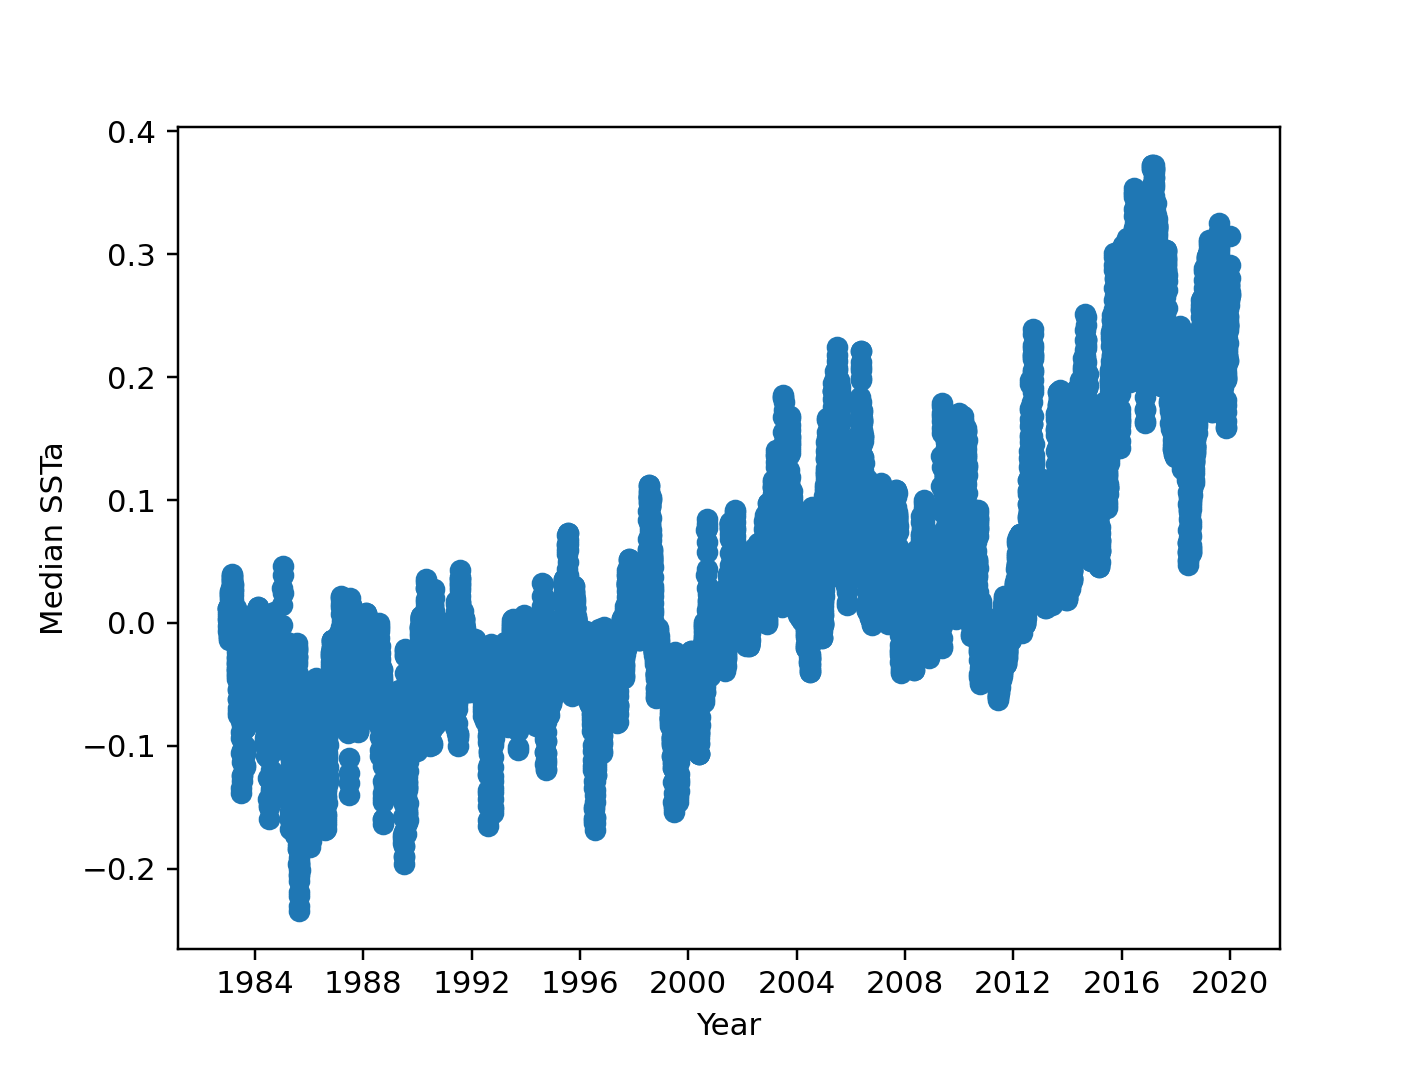

In [84]:
plt.clf()
ax = plt.gca()
#
dates = matplotlib.dates.date2num(pd_tbl.index)

ax.plot_date(dates, sv_medSSTa)
#matplotlib.pyplot.plot_date(dates, values)
#
ax.set_ylabel('Median SSTa')
ax.set_xlabel('Year')
#
plt.show()

# Fit a model

## Simple Savgol first

In [104]:
SSTa_filt = signal.savgol_filter(sv_medSSTa, 365, 3)

### Plot

<IPython.core.display.Javascript object>


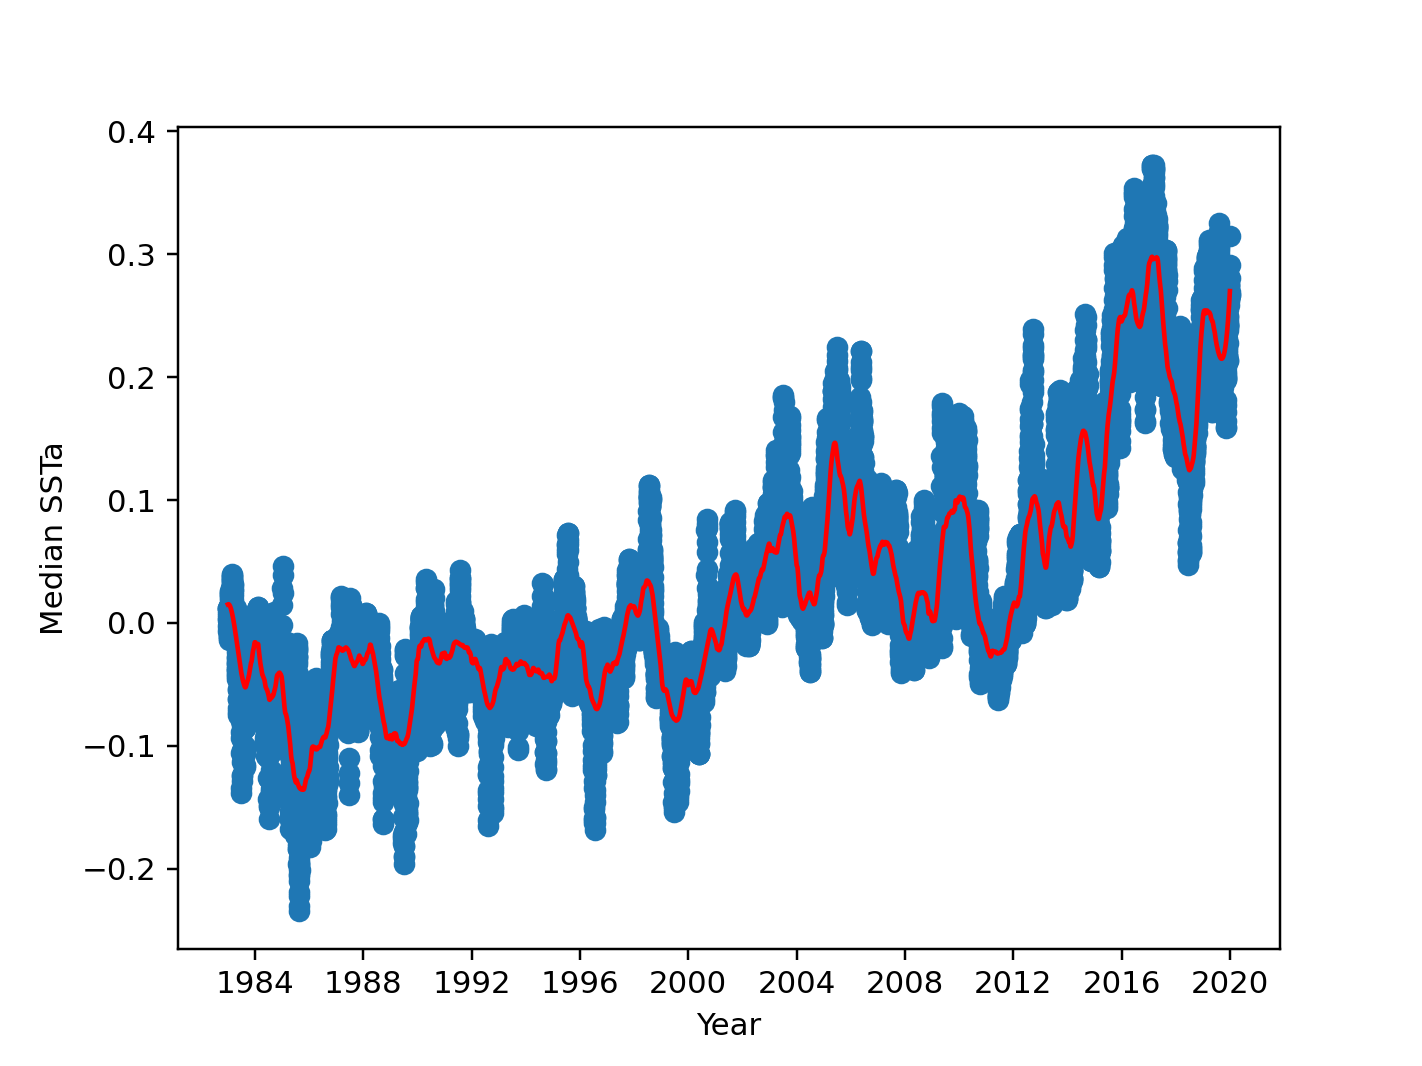

In [106]:
plt.clf()
ax = plt.gca()
#
dates = matplotlib.dates.date2num(pd_tbl.index)

ax.plot_date(dates, sv_medSSTa)
ax.plot_date(dates, SSTa_filt, 'r-')
#matplotlib.pyplot.plot_date(dates, values)
#
ax.set_ylabel('Median SSTa')
ax.set_xlabel('Year')
#
plt.show()

# Save Table

In [107]:
pd_tbl['medSSTa_savgol'] = SSTa_filt

In [109]:
pd_tbl.to_hdf('noaa_median_climate_1983_2012.hdf', 'median_climate', mode='w')

----

In [16]:
noaa_file = os.path.join(noaa_path, 'sst.day.mean.{}.nc'.format(1984))

In [17]:
sst_cube = iris.load(noaa_file, 'sst')[0]
sst_cube

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 366; latitude: 720; longitude: 1440)>

In [18]:
SST = sst_cube.data[:]

In [21]:
np.median(SST[~SST.mask])

14.170000076293945

In [23]:
np.ma.median(SST)

14.170000076293945